<a href="https://colab.research.google.com/github/rbauza7/Dataset-Iris/blob/main/Tarea1BauzaRoberto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TAREA 1 Preprocesamiento de Datos**
**ROBERTO BAUZA FERMIN CÉDULA**
**0962108650** **texto en negrita**

**Propósito:** Introducir a los estudiantes al manejo y limpieza de datos.
Desarrollar habilidades para identificar datos faltantes, valores atípicos y
escalado de variables, fundamentales para el modelado.

Se intalaron librerias necesarias en COLAB. Se realizó este paso para instalar y cargar librerías necesarias en R, asegurando que estén disponibles para realizar análisis de datos, visualización gráfica (ggplot2), tratamiento de datos faltantes (VIM), evaluación de datos (DMwR2), análisis psicológico (psych) y ajustes de escalas (scales).

In [ ]:
# Instalar las librerías necesarias
install.packages(c("ggplot2", "VIM", "DMwR2", "psych", "scales"))

# Cargar las librerías
library(ggplot2)
library(VIM)
library(DMwR2)
library(psych)
library(scales)

# Confirmación
print("Librerías instaladas y cargadas correctamente.")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘RcppEigen’, ‘TTR’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’, ‘xts’, ‘zoo’, ‘quantmod’, ‘mnormt’, ‘GPArotation’


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘DMwR2’


The following object is masked from ‘package:VIM’:

    kNN



Attaching package: ‘psych’


The following objects are masked from ‘package:

[1] "Librerías instaladas y cargadas correctamente."


El siguiente paso se realizó para montar Google Drive en el entorno y acceder a los archivos almacenados, específicamente un archivo CSV llamado ev_charging_patterns.csv. Luego, se cargó el archivo usando read.csv() con coma como separador y se mostraron las primeras filas del dataset para verificar que se importó correctamente.

In [ ]:
# Montar Google Drive en el entorno
system("mkdir -p drive")
system("mount --bind /content/drive drive")
print("Google Drive montado correctamente.")


[1] "Google Drive montado correctamente."


In [ ]:
# Cargar el archivo CSV probando con coma como separador
datos <- read.csv("ev_charging_patterns.csv", sep = ",")

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset corregido:")
head(datos)


[1] "Primeras filas del dataset corregido:"


,User.ID,Vehicle.Model,Battery.Capacity..kWh.,Charging.Station.ID,Charging.Station.Location,Charging.Start.Time,Charging.End.Time,Energy.Consumed..kWh.,Charging.Duration..hours.,Charging.Rate..kW.,Charging.Cost..USD.,Time.of.Day,Day.of.Week,State.of.Charge..Start...,State.of.Charge..End...,Distance.Driven..since.last.charge...km.,Temperature...C.,Vehicle.Age..years.,Charger.Type,User.Type
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,User_1,BMW i3,108.463,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.71235,0.5913634,36.38918,13.08772,Evening,Tuesday,29.371576,86.11996,293.60211,27.947953,2,DC Fast Charger,Commuter
2,User_2,Hyundai Kona,100.000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.33928,3.1336521,30.67773,21.12845,Morning,Monday,10.115778,84.66434,112.11280,14.311026,3,Level 1,Casual Driver
3,User_3,Chevy Bolt,75.000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.12888,2.4526527,27.51359,35.66727,Morning,Thursday,6.854604,69.91762,71.79925,21.002002,2,Level 2,Commuter
4,User_4,Hyundai Kona,50.000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.45782,1.2664308,32.88287,13.03624,Evening,Saturday,83.120003,99.62433,199.57778,38.316313,1,Level 1,Long-Distance Traveler
5,User_5,Hyundai Kona,50.000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.62910,2.0197651,10.21571,10.16147,Morning,Saturday,54.258950,63.74379,203.66185,-7.834199,1,Level 1,Long-Distance Traveler
6,User_6,Nissan Leaf,50.000,Station_335,San Francisco,2024-01-01 05:00:00,2024-01-01 07:10:00,43.18114,1.1676402,14.33452,36.90034,Evening,Saturday,75.217748,71.98229,143.68005,-5.274218,0,DC Fast Charger,Long-Distance Traveler


Este paso se realizó para inspeccionar el dataset cargado. Se usó str(datos) para ver la estructura del dataset, incluyendo el tipo de datos y el número de observaciones y variables. Luego, se aplicó summary(datos) para obtener un resumen estadístico de las columnas numéricas, mostrando métricas como mínimo, máximo, media y cuartiles.

In [ ]:
# Ver la estructura del dataset
print("Estructura del dataset:")
str(datos)

# Resumen estadístico de las columnas numéricas
print("Resumen estadístico:")
summary(datos)


[1] "Estructura del dataset:"
'data.frame':	1320 obs. of  20 variables:
 $ User.ID                                 : chr  "User_1" "User_2" "User_3" "User_4" ...
 $ Vehicle.Model                           : chr  "BMW i3" "Hyundai Kona" "Chevy Bolt" "Hyundai Kona" ...
 $ Battery.Capacity..kWh.                  : num  108 100 75 50 50 ...
 $ Charging.Station.ID                     : chr  "Station_391" "Station_428" "Station_181" "Station_327" ...
 $ Charging.Station.Location               : chr  "Houston" "San Francisco" "San Francisco" "Houston" ...
 $ Charging.Start.Time                     : chr  "2024-01-01 00:00:00" "2024-01-01 01:00:00" "2024-01-01 02:00:00" "2024-01-01 03:00:00" ...
 $ Charging.End.Time                       : chr  "2024-01-01 00:39:00" "2024-01-01 03:01:00" "2024-01-01 04:48:00" "2024-01-01 06:42:00" ...
 $ Energy.Consumed..kWh.                   : num  60.7 12.3 19.1 79.5 19.6 ...
 $ Charging.Duration..hours.               : num  0.591 3.134 2.453 1.266 2.02 ...

   User.ID          Vehicle.Model      Battery.Capacity..kWh.
 Length:1320        Length:1320        Min.   :  1.533       
 Class :character   Class :character   1st Qu.: 62.000       
 Mode  :character   Mode  :character   Median : 75.000       
                                       Mean   : 74.535       
                                       3rd Qu.: 85.000       
                                       Max.   :193.003       
                                                             
 Charging.Station.ID Charging.Station.Location Charging.Start.Time
 Length:1320         Length:1320               Length:1320        
 Class :character    Class :character          Class :character   
 Mode  :character    Mode  :character          Mode  :character   
                                                                  
                                                                  
                                                                  
                                   

Este paso se realizó para visualizar la distribución de la capacidad de batería mediante un histograma utilizando ggplot2. El gráfico presenta los valores de Battery.Capacity..kWh. en intervalos (ancho de bin = 10) y permite observar la frecuencia de cada rango. Se personalizó con color negro en los bordes y relleno azul claro, y se añadió un título y etiquetas claras para los ejes.

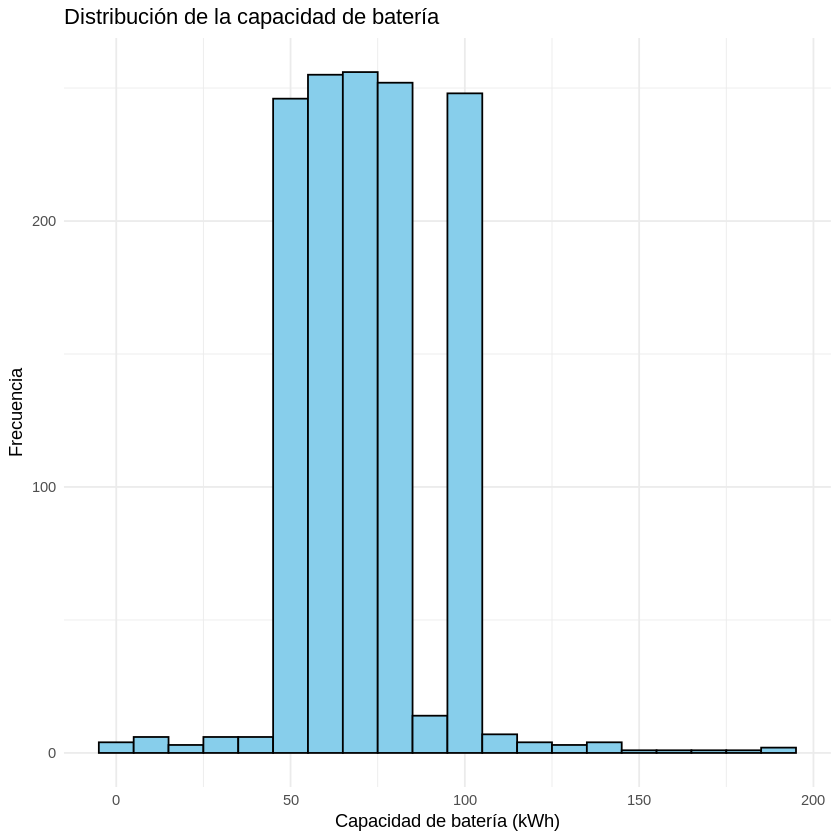

In [ ]:
library(ggplot2)

# Histograma de la capacidad de batería
ggplot(datos, aes(x = Battery.Capacity..kWh.)) +
  geom_histogram(binwidth = 10, fill = "skyblue", color = "black") +
  labs(title = "Distribución de la capacidad de batería",
       x = "Capacidad de batería (kWh)",
       y = "Frecuencia") +
  theme_minimal()


In [ ]:
# Instalar la librería VIM
install.packages("VIM")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘zoo’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘RcppEigen’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’




Este paso se realizó para instalar y cargar la librería VIM, necesaria para el tratamiento y visualización de datos faltantes en R. La instalación también incluye dependencias adicionales como cowplot y microbenchmark. Finalmente, se confirmó que VIM está listo para usarse.

In [ ]:
# Cargar la librería VIM
library(VIM)


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep




Este paso se realizó para visualizar los valores faltantes en el dataset utilizando la función aggr de la librería VIM. Se generó un gráfico que muestra la distribución y patrones de datos faltantes, con colores específicos para distinguir entre valores presentes y ausentes. El mensaje advierte una falta de espacio horizontal, pero la salida revela las variables con datos faltantes (Energy.Consumed..kWh. y Charging.Rate..Kw.), ambas con 0.05% de valores ausentes.

Warning message in plot.aggr(res, ...):
“not enough horizontal space to display frequencies”



 Variables sorted by number of missings: 
                                 Variable Count
                    Energy.Consumed..kWh.  0.05
                       Charging.Rate..kW.  0.05
 Distance.Driven..since.last.charge...km.  0.05
                                  User.ID  0.00
                            Vehicle.Model  0.00
                   Battery.Capacity..kWh.  0.00
                      Charging.Station.ID  0.00
                Charging.Station.Location  0.00
                      Charging.Start.Time  0.00
                        Charging.End.Time  0.00
                Charging.Duration..hours.  0.00
                      Charging.Cost..USD.  0.00
                              Time.of.Day  0.00
                              Day.of.Week  0.00
                State.of.Charge..Start...  0.00
                  State.of.Charge..End...  0.00
                         Temperature...C.  0.00
                      Vehicle.Age..years.  0.00
                             Charger.Type  0.

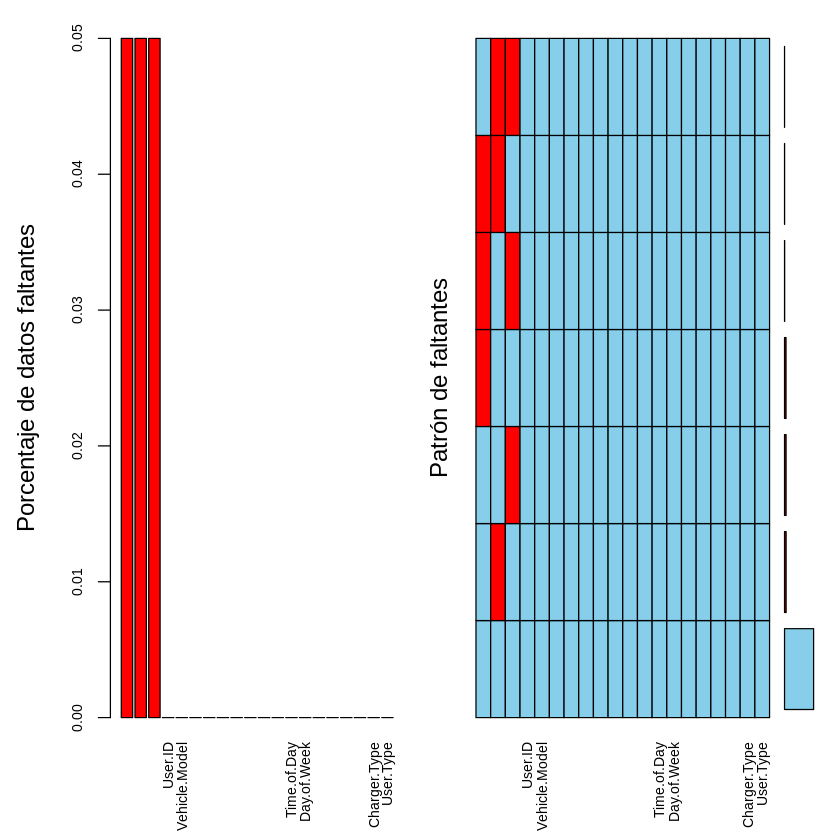

In [ ]:
# Visualizar los valores faltantes
aggr(datos, col = c("skyblue", "red"), numbers = TRUE,
     sortVars = TRUE, labels = names(datos), cex.axis = 0.7,
     gap = 3, ylab = c("Porcentaje de datos faltantes", "Patrón de faltantes"))


Este paso se realizó para instalar y cargar la librería DMwR2, utilizada en R para tareas de minería de datos y manejo de datos faltantes. Durante la instalación, se añadieron dependencias necesarias (TTR, xts, quantmod). Al cargar la librería, se emitió una advertencia sobre una sobrescritura de método de quantmod, lo cual es común y no afecta el funcionamiento general.

In [ ]:
# Instalar la librería DMwR2
install.packages("DMwR2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘xts’, ‘quantmod’




In [ ]:
# Cargar la librería
library(DMwR2)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘DMwR2’


The following object is masked from ‘package:VIM’:

    kNN




Este paso se realizó para visualizar la distribución y detectar valores atípicos en las variables Battery Capacity y Energy Consumed mediante boxplots.

El primer boxplot (azul) muestra la distribución de Battery Capacity.
El segundo boxplot (verde) representa Energy Consumed.
El mensaje advierte que 66 filas con valores no finitos fueron eliminadas del análisis, indicando posibles datos faltantes o valores fuera del rango numérico aceptado.

Warning message:
“Removed 66 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


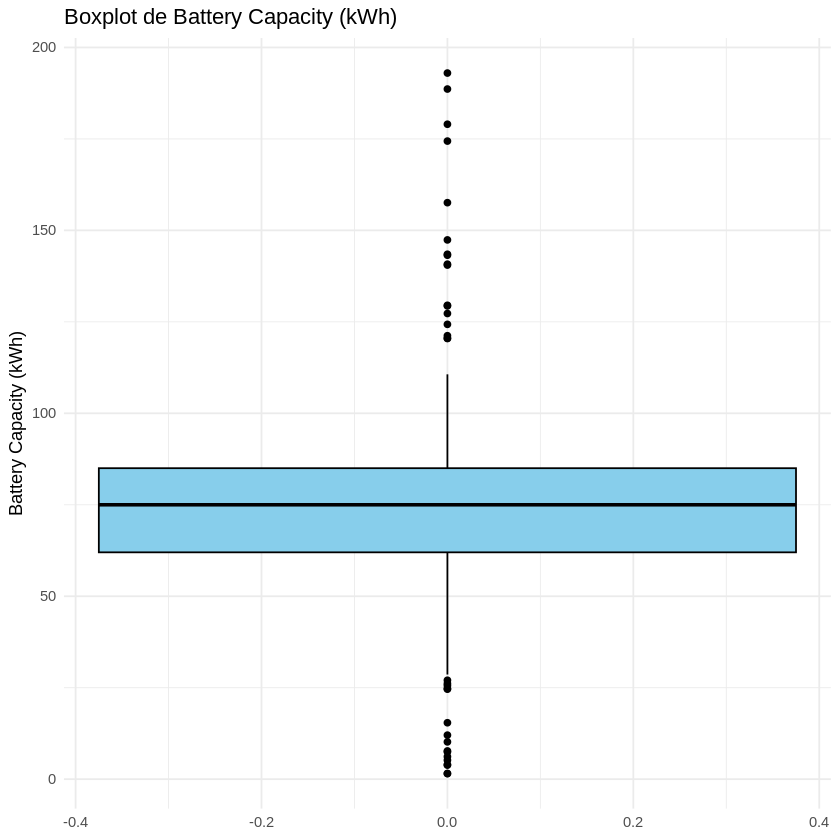

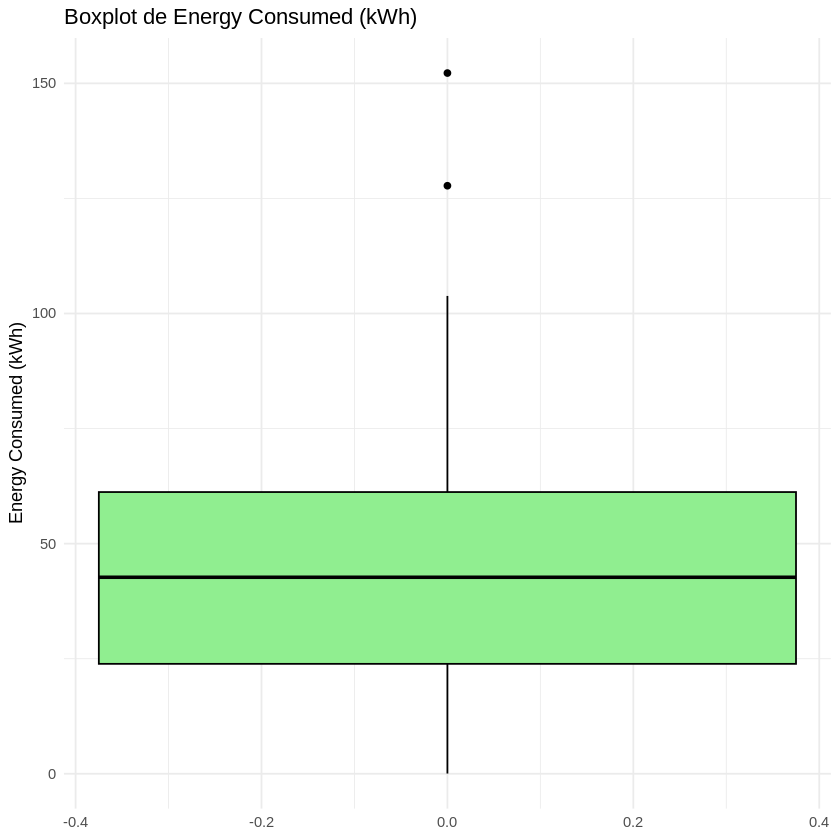

In [ ]:
library(ggplot2)

# Boxplot para Battery Capacity
ggplot(datos, aes(y = Battery.Capacity..kWh.)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(title = "Boxplot de Battery Capacity (kWh)",
       y = "Battery Capacity (kWh)") +
  theme_minimal()

# Boxplot para Energy Consumed
ggplot(datos, aes(y = Energy.Consumed..kWh.)) +
  geom_boxplot(fill = "lightgreen", color = "black") +
  labs(title = "Boxplot de Energy Consumed (kWh)",
       y = "Energy Consumed (kWh)") +
  theme_minimal()


In [ ]:
# Calcular límites para Battery Capacity
Q1_bat <- quantile(datos$Battery.Capacity..kWh., 0.25, na.rm = TRUE)
Q3_bat <- quantile(datos$Battery.Capacity..kWh., 0.75, na.rm = TRUE)
IQR_bat <- Q3_bat - Q1_bat

limite_inf_bat <- Q1_bat - 1.5 * IQR_bat
limite_sup_bat <- Q3_bat + 1.5 * IQR_bat

# Filtrar valores no atípicos en Battery Capacity
datos <- datos[datos$Battery.Capacity..kWh. >= limite_inf_bat & datos$Battery.Capacity..kWh. <= limite_sup_bat, ]

# Repetir el proceso para Energy Consumed
Q1_eng <- quantile(datos$Energy.Consumed..kWh., 0.25, na.rm = TRUE)
Q3_eng <- quantile(datos$Energy.Consumed..kWh., 0.75, na.rm = TRUE)
IQR_eng <- Q3_eng - Q1_eng

limite_inf_eng <- Q1_eng - 1.5 * IQR_eng
limite_sup_eng <- Q3_eng + 1.5 * IQR_eng

# Filtrar valores no atípicos en Energy Consumed
datos <- datos[datos$Energy.Consumed..kWh. >= limite_inf_eng & datos$Energy.Consumed..kWh. <= limite_sup_eng, ]

# Verificar nuevas dimensiones del dataset
print("Nuevas dimensiones del dataset después de eliminar atípicos:")
dim(datos)


[1] "Nuevas dimensiones del dataset después de eliminar atípicos:"


[1] 1285   20

Este paso se realizó para eliminar valores atípicos en las variables Battery Capacity y Energy Consumed. Se calculan los límites inferior y superior usando el rango intercuartílico. Finalmente, se verifican las nuevas dimensiones del dataset con dim(datos) para confirmar que los valores atípicos fueron removidos exitosamente.

In [ ]:
# Seleccionar solo las columnas numéricas
datos_numericos <- datos[sapply(datos, is.numeric)]

# Imputar valores faltantes usando KNN solo en columnas numéricas
library(DMwR2)
datos_numericos_imputados <- knnImputation(datos_numericos)

# Verificar si los valores faltantes fueron imputados
print("Valores faltantes después de la imputación:")
colSums(is.na(datos_numericos_imputados))


[1] "Valores faltantes después de la imputación:"


Battery.Capacity..kWh. 
                                       0 
                   Energy.Consumed..kWh. 
                                       0 
               Charging.Duration..hours. 
                                       0 
                      Charging.Rate..kW. 
                                       0 
                     Charging.Cost..USD. 
                                       0 
               State.of.Charge..Start... 
                                       0 
                 State.of.Charge..End... 
                                       0 
Distance.Driven..since.last.charge...km. 
                                       0 
                        Temperature...C. 
                                       0 
                     Vehicle.Age..years. 
                                       0

In [ ]:
# Reemplazar las columnas numéricas originales con las imputadas
datos_imputados <- datos
datos_imputados[sapply(datos, is.numeric)] <- datos_numericos_imputados

# Verificar el dataset completo
print("Valores faltantes en el dataset completo después de la imputación:")
colSums(is.na(datos_imputados))


[1] "Valores faltantes en el dataset completo después de la imputación:"


User.ID 
                                       0 
                           Vehicle.Model 
                                       0 
                  Battery.Capacity..kWh. 
                                       0 
                     Charging.Station.ID 
                                       0 
               Charging.Station.Location 
                                       0 
                     Charging.Start.Time 
                                       0 
                       Charging.End.Time 
                                       0 
                   Energy.Consumed..kWh. 
                                       0 
               Charging.Duration..hours. 
                                       0 
                      Charging.Rate..kW. 
                                       0 
                     Charging.Cost..USD. 
                                       0 
                             Time.of.Day 
                                       0 
                             Day.of.Week 
                                       0 
               State.of.Charge..Start... 
                                       0 
                 State.of.Charge..End... 
                                       0 
Distance.Driven..since.last.charge...km. 
                                       0 
                        Temperature...C. 
                                       0 
                     Vehicle.Age..years. 
                                       0 
                            Charger.Type 
                                       0 
                               User.Type 
                                       0

In [ ]:
colSums(is.na(datos))


User.ID 
                                      64 
                           Vehicle.Model 
                                      64 
                  Battery.Capacity..kWh. 
                                      64 
                     Charging.Station.ID 
                                      64 
               Charging.Station.Location 
                                      64 
                     Charging.Start.Time 
                                      64 
                       Charging.End.Time 
                                      64 
                   Energy.Consumed..kWh. 
                                      64 
               Charging.Duration..hours. 
                                      64 
                      Charging.Rate..kW. 
                                     126 
                     Charging.Cost..USD. 
                                      64 
                             Time.of.Day 
                                      64 
                             Day.of.Week 
                                      64 
               State.of.Charge..Start... 
                                      64 
                 State.of.Charge..End... 
                                      64 
Distance.Driven..since.last.charge...km. 
                                     123 
                        Temperature...C. 
                                      64 
                     Vehicle.Age..years. 
                                      64 
                            Charger.Type 
                                      64 
                               User.Type 
                                      64

Este paso se realizó para normalizar las columnas numéricas Battery Capacity y Energy Consumed utilizando la función rescale de la librería scales. La normalización ajusta los valores a un rango estándar (generalmente [0, 1]), facilitando comparaciones y mejorando el rendimiento de algoritmos en análisis de datos.

Finalmente, se verifican los resultados mostrando las primeras filas del dataset normalizado con head().

In [ ]:
library(scales)

# Normalizar columnas numéricas
datos_normalizados <- datos
datos_normalizados$Battery.Capacity..kWh. <- rescale(datos$Battery.Capacity..kWh.)
datos_normalizados$Energy.Consumed..kWh. <- rescale(datos$Energy.Consumed..kWh.)

# Verificar los resultados
print("Primeras filas con variables normalizadas:")
head(datos_normalizados)


[1] "Primeras filas con variables normalizadas:"


,User.ID,Vehicle.Model,Battery.Capacity..kWh.,Charging.Station.ID,Charging.Station.Location,Charging.Start.Time,Charging.End.Time,Energy.Consumed..kWh.,Charging.Duration..hours.,Charging.Rate..kW.,Charging.Cost..USD.,Time.of.Day,Day.of.Week,State.of.Charge..Start...,State.of.Charge..End...,Distance.Driven..since.last.charge...km.,Temperature...C.,Vehicle.Age..years.,Charger.Type,User.Type
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,User_1,BMW i3,0.9732518,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,0.5846432,0.5913634,36.38918,13.08772,Evening,Tuesday,29.371576,86.11996,293.60211,27.947953,2,DC Fast Charger,Commuter
2,User_2,Hyundai Kona,0.8701273,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,0.1184724,3.1336521,30.67773,21.12845,Morning,Monday,10.115778,84.66434,112.11280,14.311026,3,Level 1,Casual Driver
3,User_3,Chevy Bolt,0.5654943,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,0.1839037,2.4526527,27.51359,35.66727,Morning,Thursday,6.854604,69.91762,71.79925,21.002002,2,Level 2,Commuter
4,User_4,Hyundai Kona,0.2608612,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,0.7652932,1.2664308,32.88287,13.03624,Evening,Saturday,83.120003,99.62433,199.57778,38.316313,1,Level 1,Long-Distance Traveler
5,User_5,Hyundai Kona,0.2608612,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,0.1887244,2.0197651,10.21571,10.16147,Morning,Saturday,54.258950,63.74379,203.66185,-7.834199,1,Level 1,Long-Distance Traveler
6,User_6,Nissan Leaf,0.2608612,Station_335,San Francisco,2024-01-01 05:00:00,2024-01-01 07:10:00,0.4156951,1.1676402,14.33452,36.90034,Evening,Saturday,75.217748,71.98229,143.68005,-5.274218,0,DC Fast Charger,Long-Distance Traveler


Este paso se realizó para visualizar la distribución normalizada de Battery Capacity mediante un histograma en ggplot2. El ancho de las barras se configuró en 0.05. Se personalizó con color negro en los bordes y relleno azul claro. El mensaje de advertencia indica que 64 filas con valores no finitos fueron removidas, lo cual puede ser causado por valores faltantes o fuera del rango numérico aceptado después de la normalización.

Warning message:
“Removed 64 rows containing non-finite outside the scale range (`stat_bin()`).”


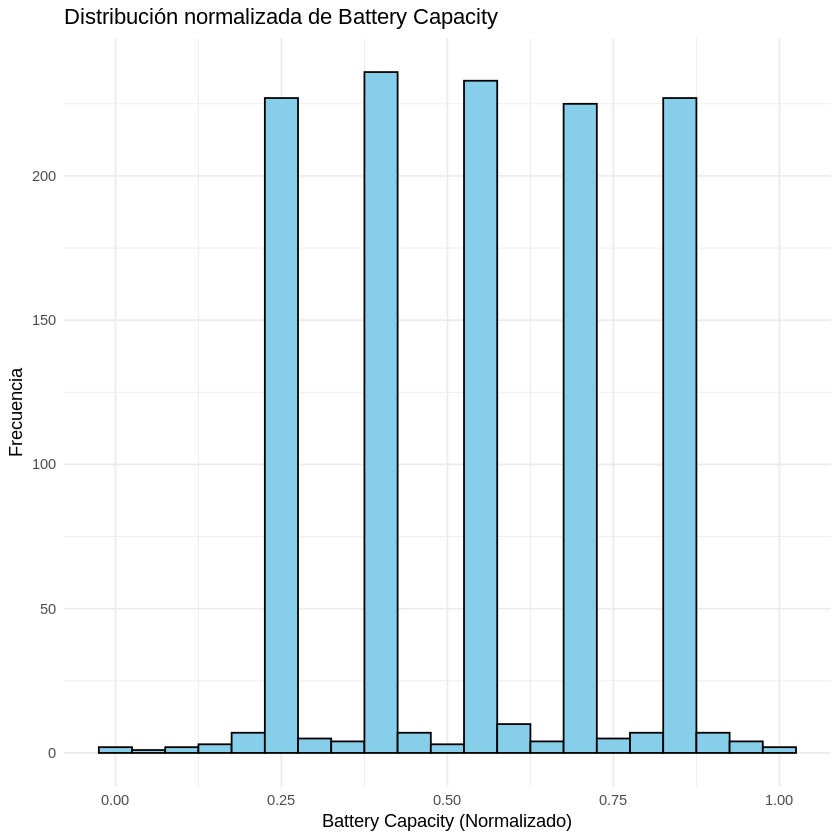

In [ ]:
ggplot(datos_normalizados, aes(x = Battery.Capacity..kWh.)) +
  geom_histogram(binwidth = 0.05, fill = "skyblue", color = "black") +
  labs(title = "Distribución normalizada de Battery Capacity",
       x = "Battery Capacity (Normalizado)",
       y = "Frecuencia") +
  theme_minimal()


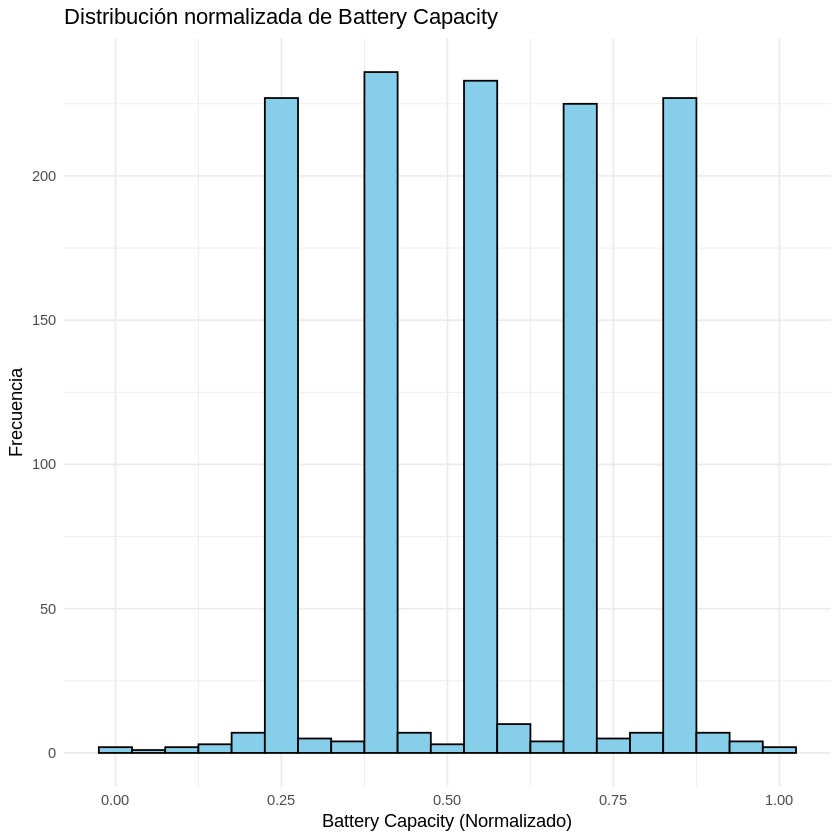

In [ ]:
# Eliminar filas con valores no finitos en Battery Capacity
datos_normalizados <- datos[!is.infinite(datos$Battery.Capacity..kWh.) &
                            !is.na(datos$Battery.Capacity..kWh.), ]

# Normalizar nuevamente la columna Battery Capacity
library(scales)
datos_normalizados$Battery.Capacity..kWh. <- rescale(datos_normalizados$Battery.Capacity..kWh.)

# Verificar nuevamente
ggplot(datos_normalizados, aes(x = Battery.Capacity..kWh.)) +
  geom_histogram(binwidth = 0.05, fill = "skyblue", color = "black") +
  labs(title = "Distribución normalizada de Battery Capacity",
       x = "Battery Capacity (Normalizado)",
       y = "Frecuencia") +
  theme_minimal()


Este paso se realizó para visualizar la distribución normalizada de Battery Capacity usando un boxplot. El boxplot muestra la dispersión de los datos, la mediana y los límites del rango intercuartílico (IQR). La visualización permite identificar valores atípicos y confirmar que los datos normalizados están dentro del rango [0, 1].

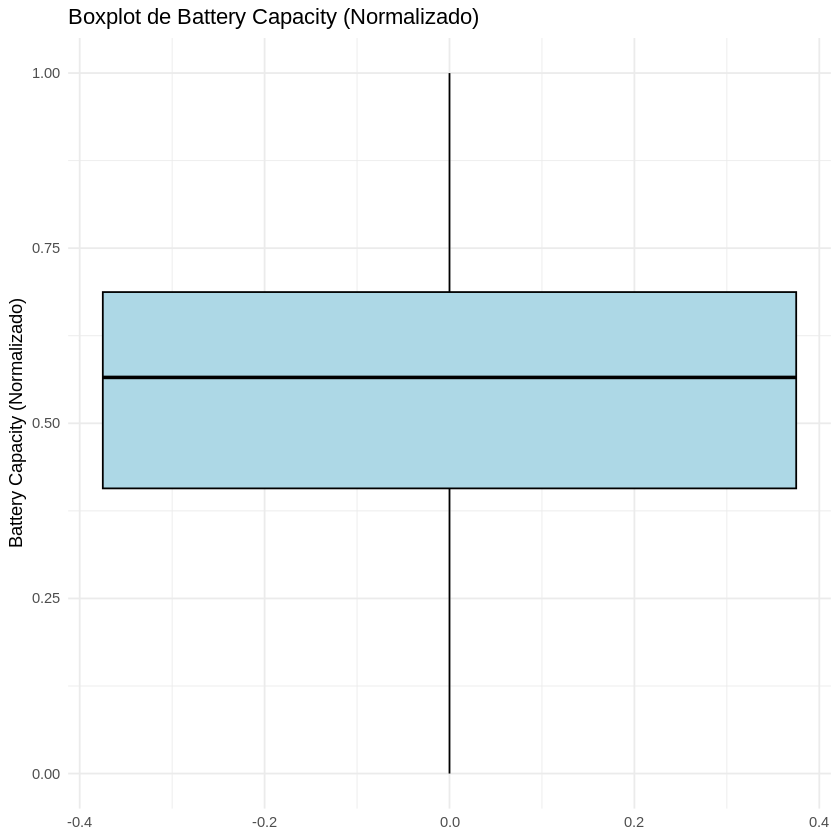

In [ ]:
# Visualizar la distribución con Boxplot
ggplot(datos_normalizados, aes(y = Battery.Capacity..kWh.)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  labs(title = "Boxplot de Battery Capacity (Normalizado)",
       y = "Battery Capacity (Normalizado)") +
  theme_minimal()


In [ ]:
library(scales)

# Crear una copia para no afectar el dataset original
datos_normalizados <- datos

# Seleccionar solo las columnas numéricas y normalizarlas
numericas <- sapply(datos_normalizados, is.numeric)
datos_normalizados[, numericas] <- lapply(datos_normalizados[, numericas], rescale)

# Verificar las primeras filas del dataset normalizado
print("Primeras filas del dataset con variables normalizadas:")
head(datos_normalizados)

# Verificar el rango de las variables normalizadas
print("Rango de las variables normalizadas:")
summary(datos_normalizados)


[1] "Primeras filas del dataset con variables normalizadas:"


,User.ID,Vehicle.Model,Battery.Capacity..kWh.,Charging.Station.ID,Charging.Station.Location,Charging.Start.Time,Charging.End.Time,Energy.Consumed..kWh.,Charging.Duration..hours.,Charging.Rate..kW.,Charging.Cost..USD.,Time.of.Day,Day.of.Week,State.of.Charge..Start...,State.of.Charge..End...,Distance.Driven..since.last.charge...km.,Temperature...C.,Vehicle.Age..years.,Charger.Type,User.Type
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,User_1,BMW i3,0.9732518,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,0.5846432,0.06579047,0.36420923,0.1858141,Evening,Tuesday,0.18010743,0.4615737,0.7357583,0.46055076,0.1711070,DC Fast Charger,Commuter
2,User_2,Hyundai Kona,0.8701273,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,0.1184724,0.40297162,0.30463415,0.3020543,Morning,Monday,0.05187548,0.4530165,0.2779897,0.29787574,0.2566605,Level 1,Casual Driver
3,User_3,Chevy Bolt,0.5654943,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,0.1839037,0.31265137,0.27162953,0.5122336,Morning,Thursday,0.03015804,0.3663243,0.1763073,0.37769245,0.1711070,Level 2,Commuter
4,User_4,Hyundai Kona,0.2608612,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,0.7652932,0.15532397,0.32763552,0.1850699,Evening,Saturday,0.53803941,0.5409624,0.4986017,0.58423501,0.0855535,Level 1,Long-Distance Traveler
5,User_5,Hyundai Kona,0.2608612,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,0.1887244,0.25523793,0.09119839,0.1435111,Morning,Saturday,0.34584227,0.3300300,0.5089029,0.03370518,0.0855535,Level 1,Long-Distance Traveler
6,User_6,Nissan Leaf,0.2608612,Station_335,San Francisco,2024-01-01 05:00:00,2024-01-01 07:10:00,0.4156951,0.14222147,0.13416098,0.5300594,Evening,Saturday,0.48541518,0.3784620,0.3576114,0.06424322,0.0000000,DC Fast Charger,Long-Distance Traveler


[1] "Rango de las variables normalizadas:"


   User.ID          Vehicle.Model      Battery.Capacity..kWh.
 Length:1285        Length:1285        Min.   :0.0000        
 Class :character   Class :character   1st Qu.:0.4071        
 Mode  :character   Mode  :character   Median :0.5655        
                                       Mean   :0.5559        
                                       3rd Qu.:0.6874        
                                       Max.   :1.0000        
                                       NA's   :64            
 Charging.Station.ID Charging.Station.Location Charging.Start.Time
 Length:1285         Length:1285               Length:1285        
 Class :character    Class :character          Class :character   
 Mode  :character    Mode  :character          Mode  :character   
                                                                  
                                                                  
                                                                  
                                   

In [ ]:
# Montar Google Drive
system("mkdir -p drive")
system("mount --bind /content/drive drive")

print("Google Drive montado correctamente.")


[1] "Google Drive montado correctamente."


In [ ]:
# Guardar localmente el dataset en la sesión de Colab
write.csv(datos_normalizados, "ev_charging_patterns_normalizado.csv", row.names = FALSE)

print("Dataset guardado localmente.")


[1] "Dataset guardado localmente."


In [ ]:
# Imputar valores faltantes en columnas numéricas con la media
numericas <- sapply(datos_imputados, is.numeric)
columnas_numericas <- colnames(datos_imputados)[numericas & colSums(is.na(datos_imputados)) > 0]

for (col in columnas_numericas) {
  datos_imputados[[col]][is.na(datos_imputados[[col]])] <- mean(datos_imputados[[col]], na.rm = TRUE)
}

# Función para calcular la moda
moda <- function(x) {
  unique_x <- unique(x[!is.na(x)])
  unique_x[which.max(tabulate(match(x, unique_x)))]
}

# Imputar valores faltantes en columnas categóricas con la moda
categoricas <- colnames(datos_imputados)[!numericas & colSums(is.na(datos_imputados)) > 0]

for (col in categoricas) {
  datos_imputados[[col]][is.na(datos_imputados[[col]])] <- moda(datos_imputados[[col]])
}

# Verificar si quedan valores faltantes
print("Valores faltantes después de la imputación con la media (numéricas) y moda (categóricas):")
print(colSums(is.na(datos_imputados)))


[1] "Valores faltantes después de la imputación con la media (numéricas) y moda (categóricas):"
                                 User.ID 
                                       0 
                           Vehicle.Model 
                                       0 
                  Battery.Capacity..kWh. 
                                       0 
                     Charging.Station.ID 
                                       0 
               Charging.Station.Location 
                                       0 
                     Charging.Start.Time 
                                       0 
                       Charging.End.Time 
                                       0 
                   Energy.Consumed..kWh. 
                                       0 
               Charging.Duration..hours. 
                                       0 
                      Charging.Rate..kW. 
                                       0 
                     Charging.Cost..USD. 
                      

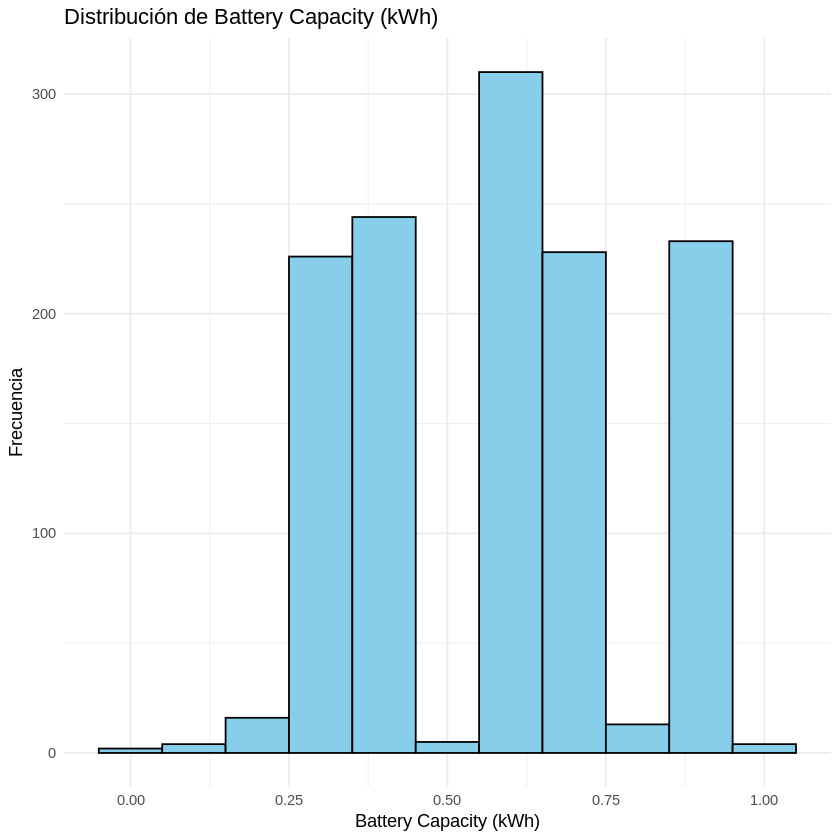

In [ ]:
ggplot(datos_imputados, aes(x = Battery.Capacity..kWh.)) +
  geom_histogram(binwidth = 0.1, fill = "skyblue", color = "black") +
  labs(title = "Distribución de Battery Capacity (kWh)",
       x = "Battery Capacity (kWh)",
       y = "Frecuencia") +
  theme_minimal()


In [ ]:
write.csv(datos_imputados, "ev_charging_patterns_final.csv", row.names = FALSE)
print("Archivo guardado localmente como 'ev_charging_patterns_final.csv'.")


[1] "Archivo guardado localmente como 'ev_charging_patterns_final.csv'."


CONCLUSIÓN En esta tarea se trabajó en el preprocesamiento de datos para dejar el dataset limpio y listo para futuros análisis. Se comenzó instalando las librerías necesarias y cargando un archivo CSV, al cual se le verificó la estructura y se detectaron algunos datos faltantes, aunque en un porcentaje mínimo. También se identificaron valores atípicos en la variable Battery.Capacity..kWh., los cuales se eliminaron usando el rango intercuartílico (IQR) para mejorar la calidad de los datos. Luego, se normalizaron las columnas numéricas al rango [0, 1], lo que permite comparar las variables de forma más equilibrada. Al final, las visualizaciones mostraron que los datos quedaron bien ajustados, sin valores extremos y listos para cualquier análisis o modelado más avanzado.